In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer,load_iris,load_wine
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report


# Breast Cancer

## Load features and target variable

In [ ]:
breast_cancer = load_breast_cancer()
bc_dataset = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
bc_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Information about dataset

In [ ]:
bc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = bc_dataset.copy()
y = pd.Series(breast_cancer.target,name="class")

## Distribution of target

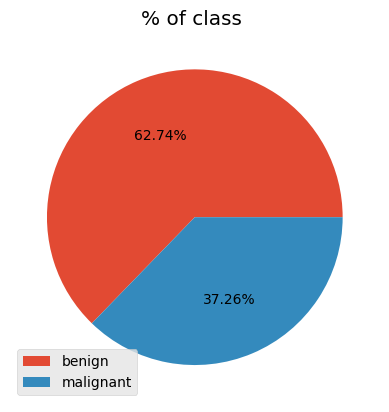

In [ ]:
plt.style.use("ggplot")
plt.pie(y.value_counts(normalize=True),autopct="%.2f%%")
plt.legend(['benign','malignant'])
plt.title("% of class ")
plt.show()

 ## Splitting the dataset
    - test size: 20%
    - training set: 80%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Standardization

In [ ]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train_scale,columns=X.columns)
x_test = pd.DataFrame(x_test_scale,columns=X.columns)

## Fitting the models

In [ ]:
SVM_Linear = svm.SVC(kernel="linear",gamma='scale')
SVM_RBF = svm.SVC(kernel="rbf")
SVM_Poly = svm.SVC(kernel="poly")

## Predicting the test instances

In [ ]:
y_pred_linear = SVM_Linear.fit(x_train,y_train).predict(x_test)
y_pred_rbf = SVM_RBF.fit(x_train,y_train).predict(x_test)
y_pred_poly = SVM_Poly.fit(x_train,y_train).predict(x_test)

## Confusion Matrix

In [ ]:
conf_matrix_linear = confusion_matrix(y_pred=y_pred_linear,y_true=y_test)
conf_matrix_rbf = confusion_matrix(y_pred=y_pred_rbf,y_true=y_test)
conf_matrix_poly = confusion_matrix(y_pred=y_pred_poly,y_true=y_test)

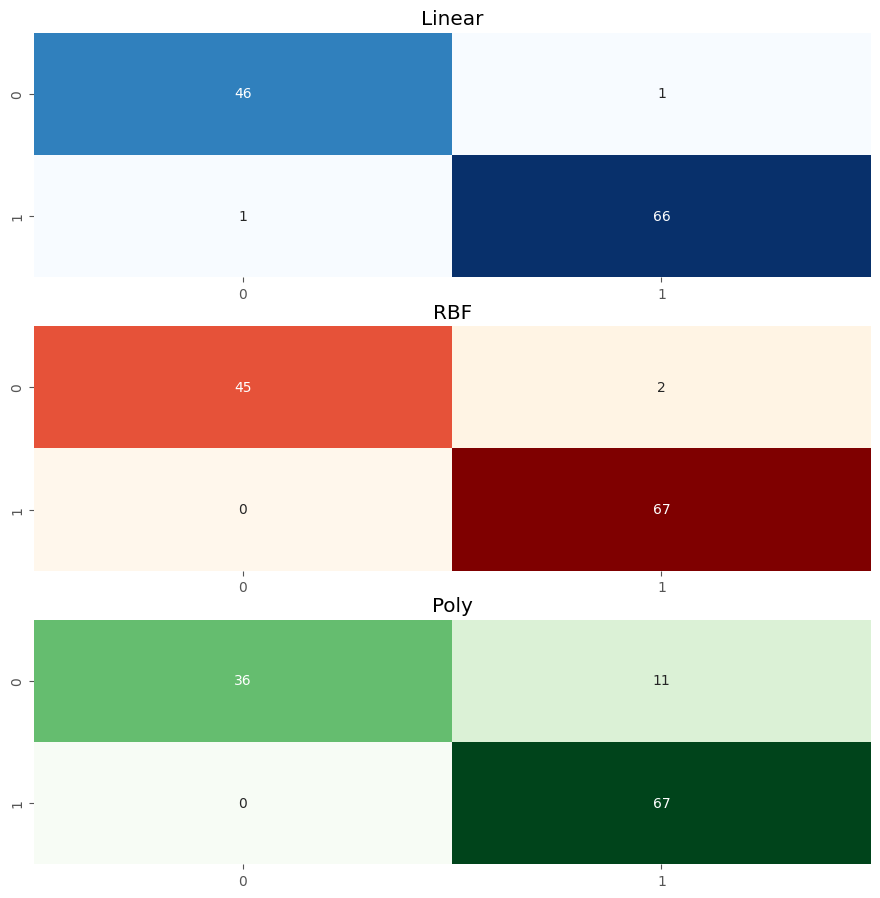

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10.8,10.8))

plt.subplot(3,1,1)
sns.heatmap(conf_matrix_linear,annot=True,fmt="d",cmap=plt.cm.Blues,cbar=False,xticklabels=y.unique(),yticklabels=y.unique())
plt.title("Linear")

plt.subplot(3,1,2)
sns.heatmap(conf_matrix_rbf,annot=True,fmt="d",cmap=plt.cm.OrRd,cbar=False,xticklabels=y.unique(),yticklabels=y.unique())
plt.title("RBF")

plt.subplot(3,1,3)
sns.heatmap(conf_matrix_poly,annot=True,fmt="d",cmap=plt.cm.Greens,cbar=False,xticklabels=y.unique(),yticklabels=y.unique())
plt.title("Poly")

plt.show()

## Classification Report

In [ ]:
report_linear = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=breast_cancer.target_names,output_dict=True)
report_linear = pd.DataFrame(report_linear)
report_linear

,malignant,benign,accuracy,macro avg,weighted avg
precision,0.978723,0.985075,0.982456,0.981899,0.982456
recall,0.978723,0.985075,0.982456,0.981899,0.982456
f1-score,0.978723,0.985075,0.982456,0.981899,0.982456
support,47.000000,67.000000,0.982456,114.000000,114.000000


In [ ]:
report_rbf = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=breast_cancer.target_names,output_dict=True)
report_rbf = pd.DataFrame(report_rbf)
report_rbf

,malignant,benign,accuracy,macro avg,weighted avg
precision,0.978723,0.985075,0.982456,0.981899,0.982456
recall,0.978723,0.985075,0.982456,0.981899,0.982456
f1-score,0.978723,0.985075,0.982456,0.981899,0.982456
support,47.000000,67.000000,0.982456,114.000000,114.000000


# Iris Dataset

## Load Dataset

In [ ]:
iris = load_iris()
iris_dataset = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Separate features and target attribute

In [ ]:
X = iris_dataset.copy()
y = pd.Series(iris.target,name="type")

## Distribution of target attribute

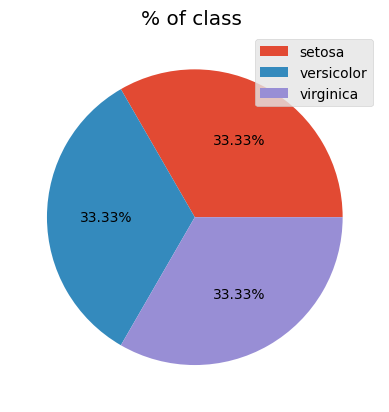

In [ ]:
plt.style.use("ggplot")
plt.pie(y.value_counts(normalize=True),autopct="%.2f%%")
plt.legend(iris.target_names)
plt.title("% of class ")
plt.show()

## Splitting the dataset into training and test dataset
    - test dataset size: 20%
    - training dataset size: 80%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


## Standardization

In [ ]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train_scale,columns=X.columns)
x_test = pd.DataFrame(x_test_scale,columns=X.columns)

## Fitting the  model

In [ ]:
SVM_Linear = svm.SVC(kernel="linear",gamma='scale')
SVM_RBF = svm.SVC(kernel="rbf",gamma='scale')
SVM_Poly = svm.SVC(kernel="poly",gamma='scale')

## Running the model on test dataset

In [ ]:
y_pred_linear = SVM_Linear.fit(x_train,y_train).predict(x_test)
y_pred_rbf = SVM_RBF.fit(x_train,y_train).predict(x_test)
y_pred_poly = SVM_Poly.fit(x_train,y_train).predict(x_test)

## Confusion Matrix

In [ ]:
conf_matrix_linear = confusion_matrix(y_pred=y_pred_linear,y_true=y_test)
conf_matrix_rbf = confusion_matrix(y_pred=y_pred_rbf,y_true=y_test)
conf_matrix_poly = confusion_matrix(y_pred=y_pred_poly,y_true=y_test)

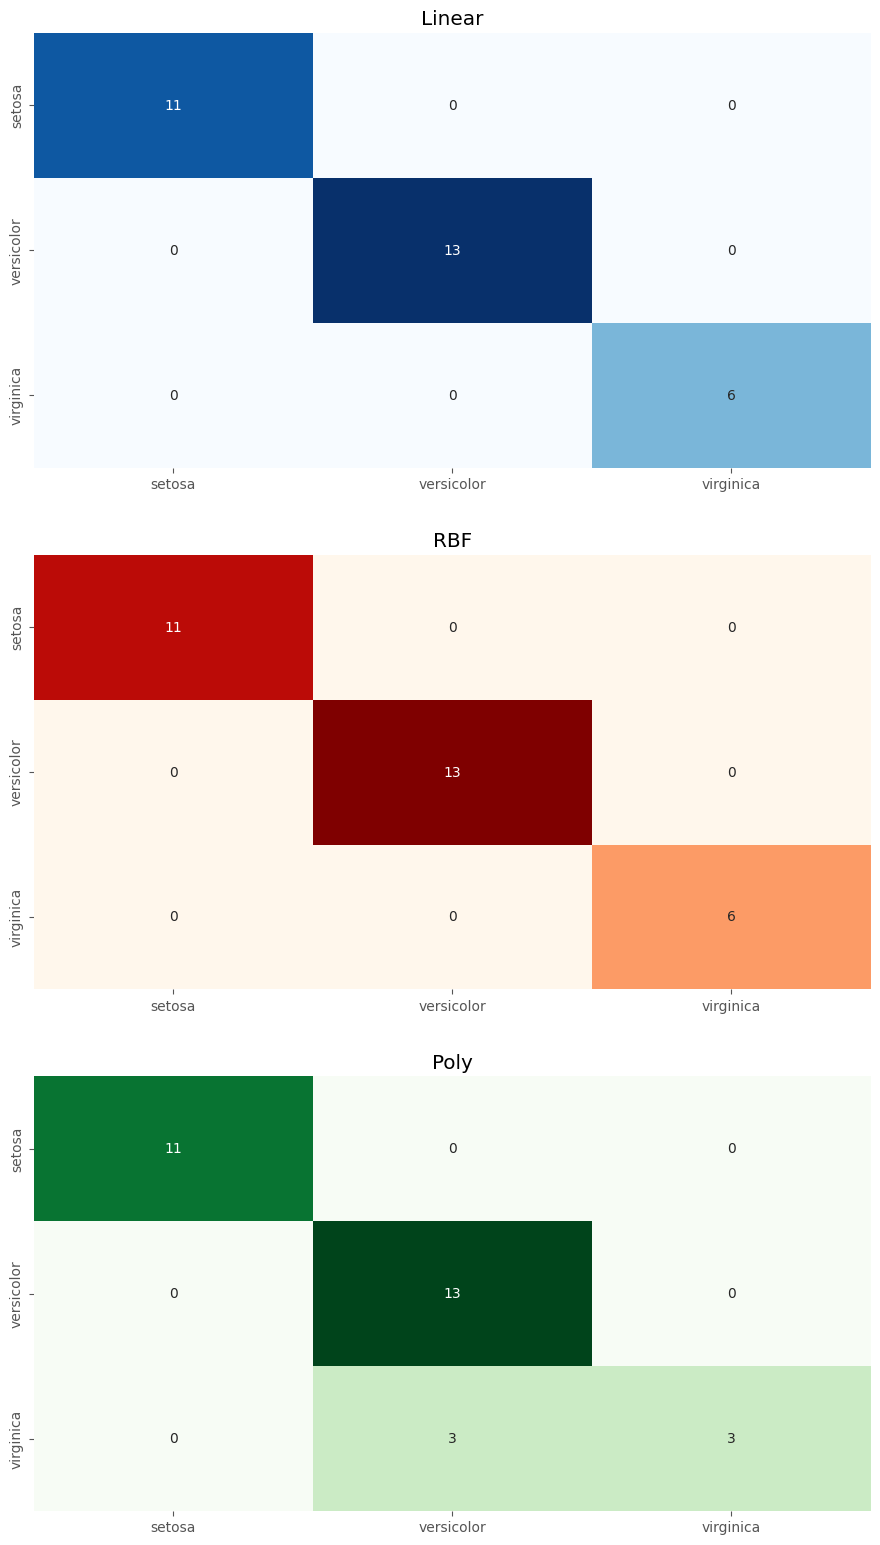

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10.8,19.2))

plt.subplot(3,1,1)
sns.heatmap(conf_matrix_linear,annot=True,fmt="d",cmap=plt.cm.Blues,cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("Linear")

plt.subplot(3,1,2)
sns.heatmap(conf_matrix_rbf,annot=True,fmt="d",cmap=plt.cm.OrRd,cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("RBF")

plt.subplot(3,1,3)
sns.heatmap(conf_matrix_poly,annot=True,fmt="d",cmap=plt.cm.Greens,cbar=False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("Poly")

plt.show()

## Classification Report

In [ ]:
report_linear = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=iris.target_names,output_dict=True)
report_linear = pd.DataFrame(report_linear)
report_linear

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,11.0,13.0,6.0,1.0,30.0,30.0


In [ ]:
report_rbf = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=iris.target_names,output_dict=True)
report_rbf = pd.DataFrame(report_linear)
report_rbf

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,11.0,13.0,6.0,1.0,30.0,30.0


In [ ]:
report_poly = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=iris.target_names,output_dict=True)
report_poly = pd.DataFrame(report_poly)
report_poly

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,11.0,13.0,6.0,1.0,30.0,30.0


# Wine

## Load dataset

In [ ]:
wine = load_wine()
wine_dataset = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Separate features and target attribute

In [ ]:
X = iris_dataset.copy()
y = pd.Series(iris.target,name="type")

## Distribution of target attribute

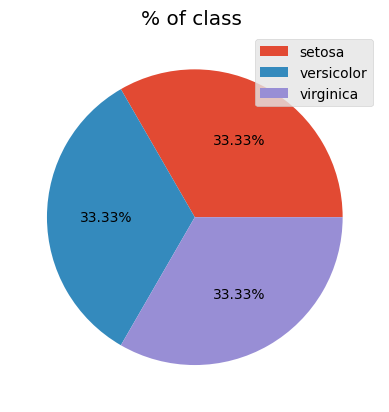

In [ ]:
plt.style.use("ggplot")
plt.pie(y.value_counts(normalize=True),autopct="%.2f%%")
plt.legend(iris.target_names)
plt.title("% of class ")
plt.show()

## Splitting the dataset into training and test dataset
    - test dataset size: 20%
    - training dataset size: 80%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


## Standardization

In [ ]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train_scale,columns=X.columns)
x_test = pd.DataFrame(x_test_scale,columns=X.columns)

## Fitting the model

In [ ]:
SVM_Linear = svm.SVC(kernel="linear",scale='gamma')
SVM_RBF = svm.SVC(kernel="rbf",scale='gamma')
SVM_Poly = svm.SVC(kernel="poly",scale='gamma')

TypeError: SVC.__init__() got an unexpected keyword argument 'scale'

## Running the model on dataset

In [ ]:
y_pred_linear = SVM_Linear.fit(x_train,y_train).predict(x_test)
y_pred_rbf = SVM_RBF.fit(x_train,y_train).predict(x_test)
y_pred_poly = SVM_Poly.fit(x_train,y_train).predict(x_test)

## Confusion Matrix

In [ ]:
conf_matrix_linear = confusion_matrix(y_pred=y_pred_linear,y_true=y_test)
conf_matrix_rbf = confusion_matrix(y_pred=y_pred_rbf,y_true=y_test)
conf_matrix_poly = confusion_matrix(y_pred=y_pred_poly,y_true=y_test)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10.8,19.2))

plt.subplot(3,1,1)
sns.heatmap(conf_matrix_linear,annot=True,fmt="d",cmap=plt.cm.Blues,cbar=False,xticklabels=wine.target_names,yticklabels=iris.target_names)
plt.title("Linear")

plt.subplot(3,1,2)
sns.heatmap(conf_matrix_rbf,annot=True,fmt="d",cmap=plt.cm.OrRd,cbar=False,xticklabels=wine.target_names,yticklabels=iris.target_names)
plt.title("RBF")

plt.subplot(3,1,3)
sns.heatmap(conf_matrix_poly,annot=True,fmt="d",cmap=plt.cm.Greens,cbar=False,xticklabels=wine.target_names,yticklabels=iris.target_names)
plt.title("Poly")

plt.show()

## Classification Report

In [ ]:
report_linear = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=wine.target_names,output_dict=True)
report_linear = pd.DataFrame(report_linear)
report_linear


In [ ]:
report_rbf = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=wine.target_names,output_dict=True)
report_rbf = pd.DataFrame(report_rbf)
report_rbf

In [ ]:
report_poly = classification_report(y_pred=y_pred_linear,y_true=y_test,target_names=wine.target_names,output_dict=True)
report_poly = pd.DataFrame(report_poly)
report_poly